In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dill
%matplotlib inline

In [2]:
#Load Session
dill.load_session('book_review.db')

In [3]:
#Save Session
dill.dump_session('book_review.db')

In [5]:
#read files
data = pd.read_csv('data/unbalanced_reviews.csv')

FileNotFoundError: [Errno 2] File data/unbalanced_reviews.csv does not exist: 'data/unbalanced_reviews.csv'

In [27]:
data.head()

,rating,review,words_count
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,16
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,21
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,99
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,42
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,22


In [28]:
data = data.drop(columns=['1682581870','57098525','13637412'])
data.columns = ['rating','review']

KeyError: "['1682581870' '57098525' '13637412'] not found in axis"

In [29]:
data_word_count =  data.assign(words_count=lambda data: data.review.str.count(' '))

In [30]:
len(data)

65534

In [31]:
data.head()

,rating,review,words_count
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,16
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,21
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,99
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,42
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,22


# Number of reviews per rating category

In [32]:
#count ratings 
ratings_counts = data.rating.value_counts()
ratings_counts

5    25437
4    19108
3    11422
2     5637
1     3930
Name: rating, dtype: int64

([<matplotlib.patches.Wedge at 0x7fad58f33890>,
 [Text(0.3786217078775749, 1.0327853612071913, '5'),
  Text(-1.075087786369876, -0.23277940544283526, '4'),
  Text(0.11637270755581254, -1.0938269483497514, '3'),
  Text(0.8776693765783772, -0.663096120797372, '2'),
  Text(1.0805361237500897, -0.20601379873962627, '1')],
 [Text(0.20652093156958626, 0.563337469749377, '38.8%'),
  Text(-0.5864115198381141, -0.12697058478700105, '29.2%'),
  Text(0.06347602230317047, -0.5966328809180461, '17.4%'),
  Text(0.478728750860933, -0.36168879316220287, '8.6%'),
  Text(0.5893833402273215, -0.11237116294888705, '6.0%')])

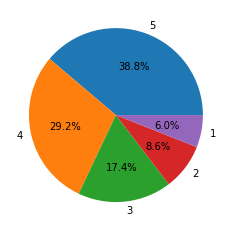

In [33]:
#percentage of ratings
plt.pie(ratings_counts,labels=list(ratings_counts.index),autopct='%1.1f%%')

<BarContainer object of 5 artists>

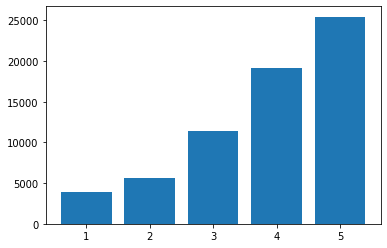

In [34]:
plt.bar(x=list(ratings_counts.index),height=ratings_counts)

# Ratio of positive vs negative reviews

In [51]:
#percentage of positve (4,5) vs negative reviews (3,2,1)
pos = data[data.rating > 3]
neg = data[data.rating < 3]
neu = data[data.rating == 3]

num_pos = len(pos)
num_neg = len(neg)
num_neu = len(neu)

per_pos = num_pos / len(data) * 100
per_neg = num_neg / len(data) * 100
per_neu = num_neu / len(data) * 100

print("Positive Rating: %",round(per_pos,2))
print("Negative Rating: %",round(per_neg,2))
print("Neu Rating: %",round(per_neu,2))

Positive Rating: % 67.97
Negative Rating: % 14.6
Neu Rating: % 17.43


In [52]:
print(num_pos)
print(num_neg)
print(num_neu)

44545
9567
11422


([<matplotlib.patches.Wedge at 0x7fad591f2290>,
 [Text(-0.5886024873868703, 0.9292723561163267, 'Pos'),
  Text(0.018771745090548957, -1.099839816330658, 'Neg'),
  Text(0.9391816666591166, -0.5726585343914855, 'Neu')],
 [Text(-0.32105590221102015, 0.5068758306089055, '67.97%'),
  Text(0.010239133685753975, -0.5999126270894498, '14.60%'),
  Text(0.5122809090867908, -0.31235920057717387, '17.43%')])

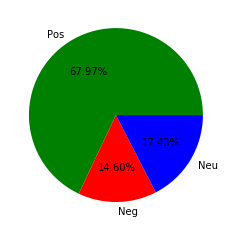

In [54]:
#pie
pos_neg_count = [num_pos,num_neg,num_neu]
plt.pie(pos_neg_count,labels=['Pos','Neg','Neu'],autopct='%1.2f%%',colors=['green','red','blue'])

# Avg \#words(length)/rating 

In [35]:
#mean number of words in each category
data = data.assign(words_count=lambda data: data.review.str.count(' '))

In [36]:
data.head()

,rating,review,words_count
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...,16
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...,21
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...,99
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...,42
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...,22


In [37]:
ratings = data.groupby(by=['rating'])

In [38]:
stats = ratings.agg({'words_count':['min','max','mean','median','std']})

In [39]:
stats

words_count                                    
               min   max       mean median         std
rating                                                
1                0  1610  70.079389     32  122.600859
2                0  1632  78.543729     43  120.777050
3                0  1664  75.137629     43  104.341302
4                0  1571  72.853308     41  106.218460
5                0  1667  66.972913     34  104.142633

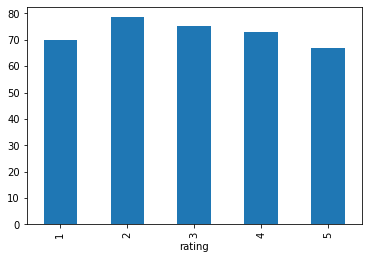

In [40]:
stats['words_count']['mean'].plot(kind='bar')

# Stats Per Pos/Neg

In [55]:
pos = data[data.rating > 3]
neg = data[data.rating <= 3]
neg_2 = data[data.rating <3]
neu = data[data.rating == 3]

In [56]:
pos_stat = pos.agg({'words_count':['min','max','mean','median','std']})
neg_stat = neg.agg({'words_count':['min','max','mean','median','std']})
neg_2_stat = neg_2.agg({'words_count':['min','max','mean','median','std']})
neu_stat = neu.agg({'words_count':['min','max','mean','median','std']})

In [57]:
print("Positive Stats")
print(pos_stat)

Positive Stats
        words_count
min        0.000000
max     1667.000000
mean      69.495364
median    37.000000
std      105.077231


In [59]:
print("Negative(1/2 only) Stats")
print(neg_2_stat)

Negative(1/2 only) Stats
        words_count
min        0.000000
max     1632.000000
mean      75.066688
median    38.000000
std      121.594508


In [60]:
print("Neu(3 only) Stats")
print(neu_stat)

Neu(3 only) Stats
        words_count
min        0.000000
max     1664.000000
mean      75.137629
median    43.000000
std      104.341302


# Median \#words(length)/rating


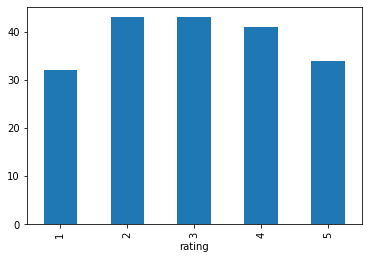

In [61]:
stats['words_count']['median'].plot(kind='bar')

# Top words in each category

In [ ]:
pos_words = []
for s in pos['review']:
    pos_words.append(s)

In [ ]:
pos_words_str = ' '.join(pos_words)

In [ ]:
neg_words = []
for s in neg['review']:
    neg_words.append(s)

In [ ]:
neg_words_str = ' '.join(neg_words)

In [ ]:
from collections import Counter

def count(string,top):
    # split() returns list of all the words in the string 
    split_it = string.split() 
  
    # Pass the split_it list to instance of Counter class. 
    counter = Counter(split_it) 
  
    # most_common() produces k frequently encountered 
    # input values and their respective counts. 
    most_occur = counter.most_common(top) 
    
    return most_occur

## without pre-processing

In [ ]:
#no pre processing
top_pos = pd.DataFrame(count(pos_words_str,100), columns=['word','count'])
top_neg = pd.DataFrame(count(neg_words_str,100), columns=['word','count'])

### Top positive

In [ ]:
top_pos

### Top Negative

In [ ]:
top_neg

## Intersection

In [ ]:
int_p = top_pos.merge(top_neg['word'],how='outer',indicator=True).loc[lambda x:x['_merge'] == 'left_only']
print(len(int_p))
int_p

In [ ]:
#int_p.to_csv('positive_only.csv')

In [ ]:
int_n = top_neg.merge(top_pos['word'],how='outer',indicator=True).loc[lambda x:x['_merge'] == 'left_only']
print(len(int_n))
int_n

In [ ]:
#int_n.to_csv('negative_only.csv')

# Processing on reviews

In [ ]:
#read files
data_new = pd.read_csv('unbalanced_reviews.csv')
data_new.columns = ['rating','x','y','z','review']
data_new = data_new[['rating','review']]

In [ ]:
data_new.head()

In [ ]:
text = 'قوي'
word = data_new[data_new['review'].str.contains(text)].groupby(['rating']).agg('count')
word['review'] = word['review'] / word['review'].sum()
word = word.transpose()
word['word'] = text
word

In [ ]:
word.plot(kind='bar')

In [ ]:
def word_weight(string):
    word = data_new[data_new['review'].str.contains(string)].groupby(['rating']).agg('count')
    word['review'] = word['review'] / word['review'].sum()
    word = word.transpose()
    word['word'] = string
    word = word.set_index('word')
    return word

In [ ]:
#apply weight for all words

#1. get all words
words = []
for s in data['review']:
    words.append(s)

In [ ]:
words = ' '.join(words)

## pre processing

In [ ]:
import preprocessing_ar

In [ ]:
words = preprocessing_ar.pre_process(words)

In [ ]:
words = words.split(' ')

In [ ]:
words = pd.DataFrame(words)

In [ ]:
words.head()

In [ ]:
words[:10]

In [ ]:
len(words)

In [ ]:
words = words.drop_duplicates()

In [ ]:
len(words)

In [ ]:
weights = word_weight('عمر')
weights

In [ ]:
#for w in words[0]:
#    we = word_weight(w)
#    weights.append(we)

In [ ]:
we = word_weight(words[0][0])
we2 = word_weight(words[0][1])

In [ ]:
we

In [ ]:
we2

In [ ]:
words[0][0]

In [ ]:
we.append(we2)

# Arabic Vs English Stats

### Plot the percentage of star ratings for Arabic vs English book reviews. Add this figure to page 1 in the document. 

In [15]:
!ls ~/code_local/review_helpfulness/data/

Untitled.ipynb                english_pos_hotel_reviews.csv
arabic_book_reviews.csv       english_reviews.json
arabic_hotel_reviews.csv      english_reviews_80k.json
english_books_reviews.csv     results
english_neg_hotel_reviews.csv


In [16]:
english_data = pd.read_json('~/code_local/review_helpfulness/data/english_reviews.json',lines=True,chunksize=80000)

In [17]:
a = next(english_data)

In [18]:
english_data = a

In [19]:
english_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,Fri Aug 25 13:55:02 -0700 2017,Mon Oct 09 08:55:59 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,16,0
1,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
2,8842281e1d1347389f2ab93d60773d4d,6392944,5e212a62bced17b4dbe41150e5bb9037,3,I haven't read a fun mystery book in a while a...,Mon Jul 24 02:48:17 -0700 2017,Sun Jul 30 09:28:03 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,Mon Jul 24 00:00:00 -0700 2017,6,0
3,8842281e1d1347389f2ab93d60773d4d,22078596,fdd13cad0695656be99828cd75d6eb73,4,"Fun, fast paced, and disturbing tale of murder...",Mon Jul 24 02:33:09 -0700 2017,Sun Jul 30 10:23:54 -0700 2017,Sun Jul 30 15:42:05 -0700 2017,Tue Jul 25 00:00:00 -0700 2017,22,4
4,8842281e1d1347389f2ab93d60773d4d,6644782,bd0df91c9d918c0e433b9ab3a9a5c451,4,A fun book that gives you a sense of living in...,Mon Jul 24 02:28:14 -0700 2017,Thu Aug 24 00:07:20 -0700 2017,Sat Aug 05 00:00:00 -0700 2017,Sun Jul 30 00:00:00 -0700 2017,8,0


In [20]:
english_data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [21]:
english_data = english_data[['rating','review_text']]

In [22]:
english_data.head(10)

,rating,review_text
0,5,Mind blowingly cool. Best science fiction I've...
1,5,This is a special book. It started slow for ab...
2,3,I haven't read a fun mystery book in a while a...
3,4,"Fun, fast paced, and disturbing tale of murder..."
4,4,A fun book that gives you a sense of living in...
5,0,Kevin highly recommended on instagram
6,4,Giving a high rating because I heard the organ...
7,5,I decided to give up eating processed sugar fo...
8,5,I haven't read a non-fiction book this engagin...
9,4,"Kevin Kelly, who is a Wired co-founder, lays o..."


In [23]:
english_data = english_data[english_data['rating'] != 0]

In [24]:
star_ratings = english_data.groupby(by=['rating'])

In [25]:
eng_pers = (star_ratings.agg({'rating':['count']}) / len(english_data))
eng_pers

,rating
,count
rating,
1,0.029628
2,0.079769
3,0.224758
4,0.356547
5,0.309298


In [26]:
ar_pers = ratings.agg({'rating':['count']})/len(data)
ar_pers

,rating
,count
rating,
1,0.059969
2,0.086016
3,0.174291
4,0.291574
5,0.388150


In [ ]:
ar_pers['rating']['count']

In [ ]:
index = [1,2,3,4,5]
group = pd.DataFrame({'ar':ar_pers['rating']['count'],'en':eng_pers['rating']['count']},index=index)

In [ ]:
group

In [ ]:
group_100 = round(group*100,2)
group_100

In [ ]:
plot = group_100.plot(kind='bar',ylim=(0,60),figsize=(10,7),zorder=2,title='Distribution of Books Reviews Star Ratings')
plot.grid('on', which='major', axis='y', zorder=-1)
plot.set_ylabel('Percentage (%)')
plot.set_xlabel('Rating')

for i in plot.patches:
    plot.text(i.get_x(), i.get_height()+1, str(round((i.get_height()), 1)), fontsize=10)

### Get the min, max, median, std for English & Arabic book reviews. This should be done for the overall data and for the positive vs negative reviews. Feed in this data into the tables in page 2 of the draft analysis document.

In [41]:
eng_count = english_data.assign(words_count=lambda data: data.review_text.str.count(' '))
eng_count

,rating,review_text,words_count
0,5,Mind blowingly cool. Best science fiction I've...,180
1,5,This is a special book. It started slow for ab...,370
2,3,I haven't read a fun mystery book in a while a...,86
3,4,"Fun, fast paced, and disturbing tale of murder...",184
4,4,A fun book that gives you a sense of living in...,79
...,...,...,...
79994,2,"This author is the sister of Chris McCandless,...",86
79995,3,"This is a good book, not a great book. It was ...",79
79996,3,"Many people really like this book, but I am wo...",100
79997,2,I picked this up based on a review in the New ...,63


In [42]:
eng_count['words_count'].describe()

count    77123.000000
mean       128.913930
std        175.860168
min          0.000000
25%         24.000000
50%         63.000000
75%        161.000000
max       3380.000000
Name: words_count, dtype: float64

In [43]:
eng_count['words_count'].median()

63.0

In [44]:
eng_count[eng_count['words_count'] > 0]['words_count'].describe()

count    76346.000000
mean       130.225932
std        176.268819
min          1.000000
25%         24.000000
50%         64.000000
75%        162.000000
max       3380.000000
Name: words_count, dtype: float64

In [50]:
eng_stats = round(eng_count.groupby(['rating']).agg({'words_count':['min','max','mean','median','std']}),1)
eng_stats

words_count                           
               min   max   mean median    std
rating                                       
1                0  3199  134.9     64  216.8
2                0  3018  130.1     65  188.1
3                0  2821  118.8     60  164.9
4                0  3151  132.9     69  168.1
5                0  3380  130.9     59  184.3

#### ar_stats = stats
round(ar_stats,2)

In [ ]:
ar_data = pd.read_csv('data/unbalanced_reviews.csv')

In [ ]:
ar_data.head

In [ ]:
ar_data = ar_data.drop(columns=['1682581870','57098525','13637412'])
ar_data.columns = ['rating','review']

In [ ]:
ar_count = ar_data.assign(words_count=lambda data: data.review.str.count(' '))

In [ ]:
ar_count.head()

In [ ]:
ar_count['words_count'].describe()

In [ ]:
ar_count['words_count'].median()

# English per pos/neg word count analysis

In [62]:
eng_pos = eng_count[eng_count['rating'] > 3]
eng_neg = eng_count[eng_count['rating'] <= 3]
eng_neg2 = eng_count[eng_count['rating'] < 3]
eng_neu = eng_count[eng_count['rating'] == 3]

In [63]:
eng_pos.agg({'words_count':['min','max','mean','median','std']})

,words_count
min,0.000000
max,3380.000000
mean,131.939516
median,64.000000
std,175.784225


In [ ]:
eng_neg.agg({'words_count':['min','max','mean','median','std']})

In [64]:
eng_neg2.agg({'words_count':['min','max','mean','median','std']})

,words_count
min,0.000000
max,3199.000000
mean,131.369444
median,64.000000
std,196.247235


In [65]:
eng_neu.agg({'words_count':['min','max','mean','median','std']})

,words_count
min,0.000000
max,2821.000000
mean,118.755452
median,60.000000
std,164.875776


# Lexicon creation

## Arabic Book Reviews Lexicon 

In [ ]:
# This code is for creating PMI lexicon. 
from __future__ import division
import codecs
#import unicodecsv as csv
import os
import csv
import math
import operator
from nltk import FreqDist
import pandas as pd
import numpy as np
import re
import emoji
import collections
from nltk.stem.arlstem import ARLSTem #gave best resulst
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

def remove_chars_re_unicode(subj):
    chars = [u'َ',u'ً',u'ُ',u'ٌ',u'ِ',u'ٍ', u'ْ', u'ّ', u'ـ'] # fatha, fathatan, damma, dammatan, kasra, kasratan, skuun, Shaddah, Tatweel
    return re.sub(u'(?u)[' + re.escape(''.join(chars)) + ']', '', subj)

def remove_emoji(subj):
    return re.sub(u'(?u)[' + re.escape(''.join(emoji.UNICODE_EMOJI)) + ']', ' ', subj)

def remove_repeating_char(text):
    return re.sub(r'(\w)\1\1+', r'\1', text)

data_path = "unbalanced_reviews.csv"

#read data
with open(data_path, encoding="utf-16") as file:
    reader = csv.reader(file, delimiter="\t")
    reviews = list(reader)
#print (reviews[:2])
 
#creating a dataframe from array "reviews"
reviews = np.array(reviews)   #first convert to numpy array
#second convert to dataframe 
df = pd.DataFrame(data=reviews[1:,1:], # use all rows except first one as values
                  index=reviews[1:,0],    # use first 1st column as index
                  columns=reviews[0,1:])  # use 1st row as the column names


#print(df["review"].head(5))
#print(df["rating"].head(5))


#in testing mode, apply only to sample of the data
#df= df.head(500)

#preprocess reviews

#define stemmers
st_ARLST = ARLSTem() # #http://www.nltk.org/_modules/nltk/stem/arlstem.html#ARLSTem


#Loading arabic stop words from file
stop_words = [] # read stopwords from csv file and store it here
with codecs.open('stop_words.csv', 'r', 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        for item in row: #to flatten 2D array
            stop_words.append(item) 
        


df["review"] = df["review"].str.replace(u"أ", u"ا") # ALEF WITH HAMZA ABOVE to ALEF
df["review"] = df["review"].str.replace(u"إ", u"ا")  # ALEF WITH HAMZA BELOW to ALEF
df["review"] = df["review"].str.replace(u"آ", u"ا")  # ALEF WITH MADDA ABOVE to ALEF
df["review"] = df["review"].str.replace(u"ٱ", u"ا")  # ALEF WITH DAMA ABOVE to ALEF
df["review"] = df["review"].str.replace(u"ى", u"ي")  # ALEF MAKSOURA TO YA
df["review"] = df["review"].str.replace(u"ة", u"ه")  # TA MARBOTA TO HA
df["review"]= df["review"].apply(remove_chars_re_unicode) # remove diacritics and tatweel/kashida
df["review"]= df["review"].apply(remove_repeating_char)  # remove repitition only if a letter is repeated more than two times
df["review"] = df["review"].str.replace(r'\bhttps:[^\s]+\b', ' somelink ')  # normalize any link to somelink
df["review"] = df["review"].str.replace(r'@([A-Za-z0-9_]+)', ' someuser ')  # normalize any user mention to someuser
df["review"] = df["review"].str.replace(r'([0-9]+)', ' somenumber ')  # normalize any English number to somenumber
df["review"] = df["review"].str.replace(r'([\u0660-\u0669]+)', ' somenumber ')  # normalize any Arabic number to somenumber
df["review"] = df["review"].str.replace(r'[^\w\s]', " ", re.UNICODE)  # remove all punctuations (non-word charactesrs)
df["review"] = df["review"].apply(lambda x: ' '.join([word for word in x.split() if len(word) >1 ]))# remove one-letter word
df["review"] = df["review"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) # remove stop words
#df["review"]= df["review"].apply(remove_emoji) # remove emojis
#df["review"] = df["review"].apply(lambda x: ' '.join([st_ARLST.stem(w) for w in x.split()]))  # stem words using ARLSTem

#print(df["review"].head(5))



#print (list(df)) #print headers
#print (df.shape) # print total number of reviews 
#print (df["rating"].value_counts()) #print star rating distribution 


#drop rows with empty reviews 
df = df[df['review'].notnull()] #if this lines throughs an error try nona insteadt of notnull


# get a list of words a long with their frequencies in the dataset
print ("\n creating a dictionary of words along with their frequencies...")
fdist= df.review.str.split(expand=True).stack().value_counts()
print ("\n Most common words in the dataset\n", fdist[:5])
# keep words with freq higher than 10 
wordlistfreq = {k:v for k, v in fdist.items() if v > 10} 
 

#find number of times a word was mentioned in the postive reviews and negative reveiws
df['rating'] = df['rating'].astype(int) #convert string to int
print ("\n getting counts for each word")
term_pos_cnt = df.loc[df["rating"]>3].review.str.split(expand=True).stack().value_counts()
term_neg_cnt = df.loc[df["rating"]<=3].review.str.split(expand=True).stack().value_counts()


#calculating CSPMI for each word     
print ("\n computing PMI score for each word")
cspmi={}
pos_cnt = len(df[(df['rating']>3)])  # number of positve reviews  
neg_cnt = len(df[(df['rating']<=3)]) # number of negative reviews 
for w in wordlistfreq.keys():
    cspmi[w] = math.log(((term_pos_cnt.get(w, 1)* neg_cnt)/(term_neg_cnt.get(w,1)* pos_cnt)),2)
sorted_csmpi = sorted(cspmi.items(), key=operator.itemgetter(1), reverse=True)
#print (sorted_csmpi[:100])


#write results to csv
path ='./Data/PMI_wordlist_ar2.csv'
print ("\n Writing results to CSV file in", path)
with open(path, encoding='utf-8-sig', mode='w') as csv_file: 
    writer = csv.writer(csv_file)
    writer.writerow(['term','pmi_score'])
    # Get the date
    for key, value in sorted_csmpi:
        row = [key,value]
        writer.writerow(row)




## English Books Revies Lexicon